In [1]:
#check accuracy on the train set
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from oracle.inference_oracle import inference_oracle
from scipy.stats import spearmanr, pearsonr

import matplotlib as mpl

font = {'family' : 'sans-serif',
        'size'   : 16}
mpl.rc('font', **font)
mpl.rc('lines', linewidth=2)
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2

In [2]:
protein = "TrpB"
df = pd.read_csv(f"data/{protein}_fitness.csv")
df

,Combo,mut,n_mut,fitness,split
0,AAALIYVFGSVSGSY,T117A,1,0.147975,train
1,AACLIYVFGSVSGSY,T117A:A119C,2,0.086008,train
2,AADLIYVFGSVSGSY,T117A:A119D,2,0.041572,train
3,AAELIYVFGSVSGSY,T117A:A119E,2,0.055187,train
4,AAFLIYVFGSVSGSY,T117A:A119F,2,0.028529,train
...,...,...,...,...,...
111878,YYSLIYVFGSVSGSY,T117Y:A118Y:A119S,3,0.014703,train
111879,YYTLIYVFGSVSGSY,T117Y:A118Y:A119T,3,0.010432,train
111880,YYVLIYVFGSVSGSY,T117Y:A118Y:A119V,3,0.000000,train
111881,YYWLIYVFGSVSGSY,T117Y:A118Y:A119W,3,0.000000,train


In [3]:
results_df = pd.DataFrame(columns=["split", "y_true", "y_pred"])
for split in ["train", "validation", "test"]:
    data = df[df["split"] == split]
    loss, y_pred = inference_oracle(split, protein, model_path=f"oracle/checkpoints/{protein}")
    y_true = data["fitness"].values
    results_df = pd.concat((results_df, pd.DataFrame({"split": split, "y_true": y_true, "y_pred": y_pred})))
    corr, _ = spearmanr(y_true, y_pred)
    print(f"{split} spearman correlation: {corr}")
    corr, _ = pearsonr(y_true, y_pred)
    print(f"{split} pearson correlation: {corr}")

/disk1/jyang4/repos/guided-discrete-diffusion/oracle/inference_oracle.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f"{model_path}/{f

train spearman correlation: 0.651463292768534
train pearson correlation: 0.9229833415968037


/disk1/jyang4/repos/guided-discrete-diffusion/oracle/inference_oracle.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_loss = criterion(torch.tensor(predictions), test_dataset.y)
/disk1/jyang4/miniconda3/envs/diffusion-guidance/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([12952, 1])) that is different to the input size (torch.Size([12952])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


validation spearman correlation: 0.23229211673588676
validation pearson correlation: 0.7950358394578971


/disk1/jyang4/repos/guided-discrete-diffusion/oracle/inference_oracle.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f"{model_path}/{f

test spearman correlation: 0.22543261767666145
test pearson correlation: 0.8076519790201232


In [11]:
corr, _ = pearsonr(y_true, y_pred)
print(f"{split} pearson correlation: {corr}")

test pearson correlation: 0.9320171069186467


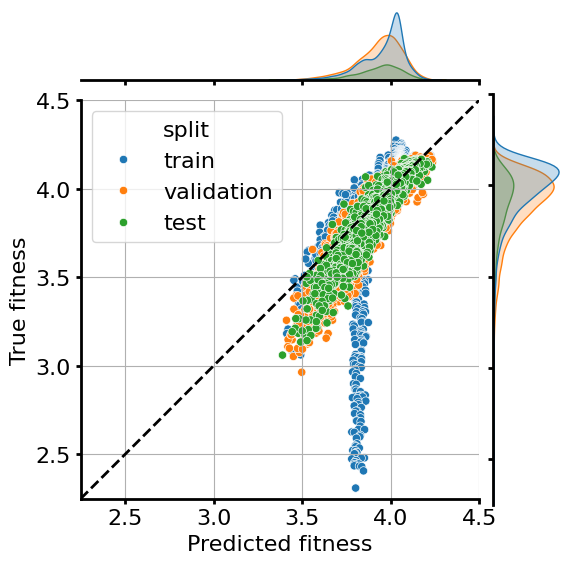

In [12]:
plt.figure_size = (7, 7)
sns.jointplot(data=results_df, x="y_pred", y="y_true", hue="split", legend=True)
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, ls="--", c="black")
#set axes to be proportional
if protein == "TrpB":
    plt.xlim(-0.5, 2.5)
    plt.ylim(-0.5, 2.5)
else:
    plt.xlim(2.25, 4.5)
    plt.ylim(2.25, 4.5)
    #add x-axis at 0
plt.axvline(0, color="black", ls="-")
plt.axhline(0, color="black", ls="-")
plt.gca().set_aspect("equal")
plt.ylabel("True fitness")
plt.xlabel("Predicted fitness")
plt.grid()
plt.savefig(f"figures/{protein}_oracle_accuracy.png", dpi=500)